In [ ]:
import tensorflow as tf
from keras.applications import ResNet50
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [ ]:
resnet = ResNet50()

102967424/102967424 [==============================] - 1s 0us/step


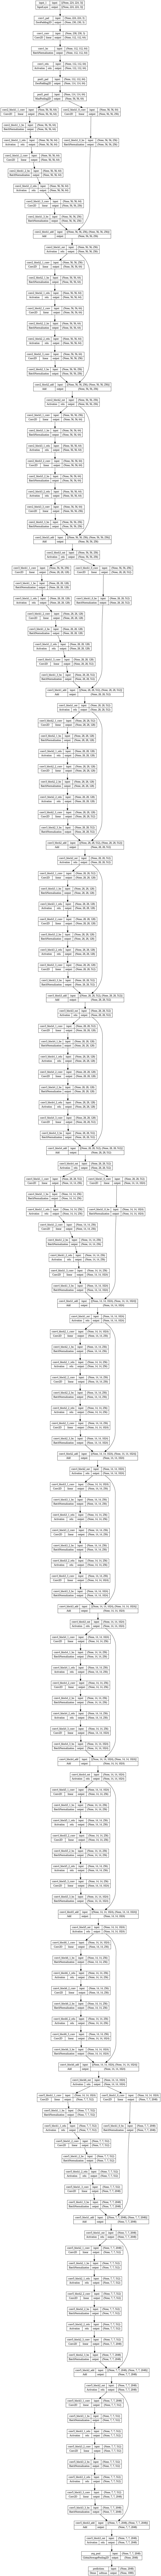

In [ ]:
plot_model(resnet, show_layer_names=True, show_layer_activations=True,
           show_shapes=True)

In [ ]:
resnet50 = ResNet50(include_top=False, weights='imagenet',
                    input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 1s 0us/step


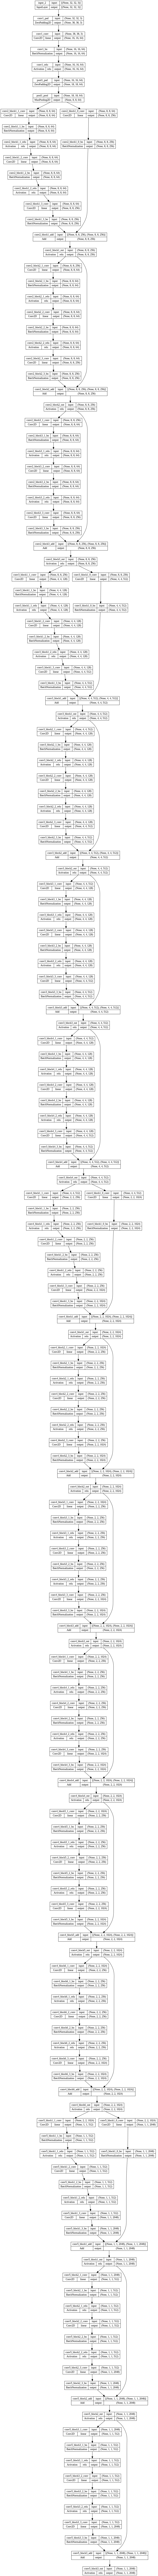

In [ ]:
plot_model(resnet50, show_layer_names=True, show_layer_activations=True,
           show_shapes=True)

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#Flatten output layer of Resnet
flattened = Flatten()(resnet50.output)

#Fully connected layer 1
fc1 = Dense(128, activation='relu', name="AddedDense1")(flattened)

#Fully connected layer, output layer
fc2 = Dense(10, activation='softmax', name="AddedDense2")(fc1)

In [ ]:
resnet50.trainable = False

In [ ]:
model = Model(inputs=resnet50.inputs, outputs=fc2)

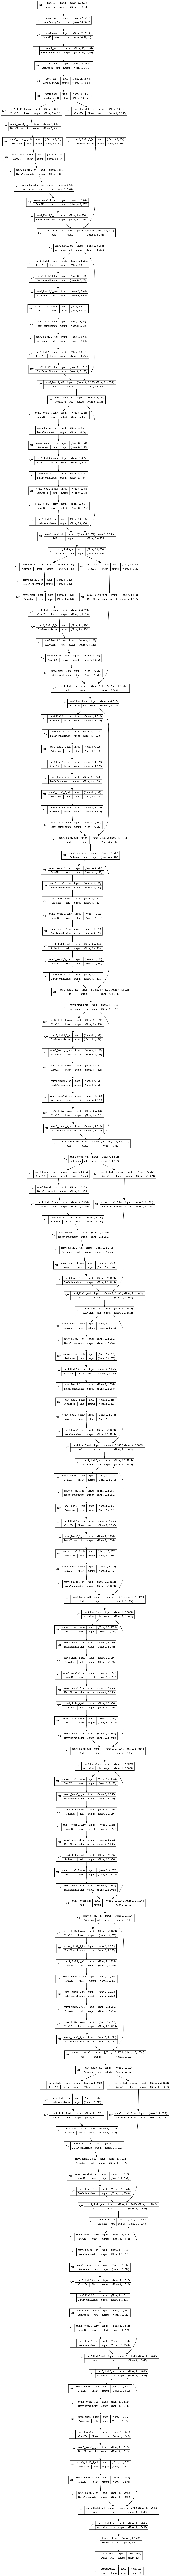

In [ ]:
plot_model(model, show_layer_names=True, show_layer_activations=True,
           show_shapes=True, show_trainable=True)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6237 - accuracy: 0.7772
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5907 - accuracy: 0.7891
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5640 - accuracy: 0.7989
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5341 - accuracy: 0.8096
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5110 - accuracy: 0.8161
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4899 - accuracy: 0.8245
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4601 - accuracy: 0.8343
Epoch 8/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4374 - accuracy: 0.8433
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4216 - accuracy: 0.8484
Epoch 10/10
1563/1563 [==============================] - 21s 13m

In [ ]:
resnet50.trainable = True

In [ ]:
model = Model(inputs=resnet50.inputs, outputs=fc2)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 125s 54ms/step - loss: 1.8028 - accuracy: 0.3768
Epoch 2/10
 526/1563 [=========>....................] - ETA: 52s - loss: 1.5598 - accuracy: 0.4437

KeyboardInterrupt: 